# Import data

Working with 567 sets of images
Working with 6793 images
Image examples: 
./rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002677.png
BOO


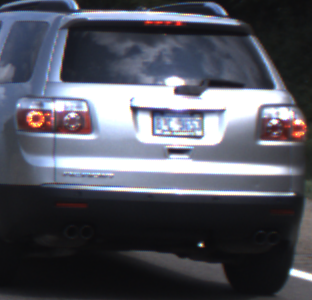

./rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002679.png
BOO


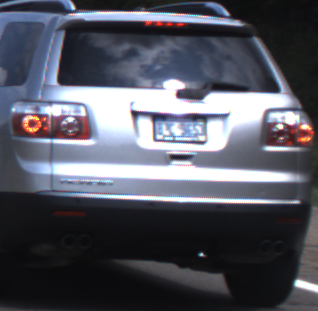

In [1]:
import os
from IPython.display import Image as _Imgdis

difficulty = "Easy"

dataset_folder = "./rear_signal_dataset"
X_train_path = []
Y_train = []
image_count = 0
sequence_limit = 12

labels = []

with open("{0}/{1}.txt".format(dataset_folder, difficulty)) as f:
    content = f.readlines()
    for folder in content:
        # Load the data
        folder_components = folder.split("_")
        folder_components[-1] = folder_components[-1][:-1]
        base = str("_".join(folder_components[:-2]))
        folder = "{0}/{1}/{2}".format(dataset_folder, base, (base + "_" + str(folder_components[-2])))
        folder += "/" + (str("_".join(folder_components)))
        folder += "/light_mask"
        images = [folder + "/" + f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        image_count += len(images[0:sequence_limit])
        X_train_path.append(images[0:sequence_limit])
        Y_train.append(folder_components[-2])


print("Working with {0} sets of images".format(len(X_train_path)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    print(X_train_path[0][i])
    print(Y_train[0])
    display(_Imgdis(filename=X_train_path[0][i], width=240, height=320))

# Layer structure

<img src="images/layer_structure.png">

# Construct NN

In [9]:
import keras
from keras.layers import Input, Conv2D, Dense, LSTM,MaxPooling2D , Flatten

x = Input(shape=(227,227,3)) #(32, 32, 3))
print('x', x.shape)
c1 = keras.layers.Conv2D(filters=96, kernel_size=7, strides=2, padding='valid')(x)
print('c1',c1.shape, 'expected (111,111,96)')
p1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c1)
print('p1', p1.shape,'expected (55,55,96)')
c2 = keras.layers.Conv2D(filters=384, kernel_size=3, strides=2, padding='valid')(p1)
print('c2', c2.shape,'expected (26,26,384)')
p2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c2)
print('p2', p2.shape,'expected (13,13,384)')
c3 = keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p2)
print('c3', c3.shape,'expected (13,13,512)')
c4 = keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(c3)
print('c4', c4.shape,'expected (13,13,512)')
c5 = keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same')(c4)
print('c5', c5.shape,'expected (13,13,384)')
p5 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)
print('p5', p5.shape,'expected (6,6,384)')
f1 = keras.layers.Flatten()(p5)
print('flat', f1.shape)

#for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).
fc6 = keras.layers.Dense(4096)(f1) # dense layer == fully connected
print('fc1', fc1.shape)

#For LSTM if return_sequences would be True, then there would be three dimensions (batch_size, timesteps, units) as output. 
#return_sequences if False, then it produces only two outputs batch_size and units.

# TODO, mis on LSTM input?
#Keras LSTM takes and input with shape of (n_examples, n_times, n_features) and your layers input has to have this shape
lstm1 = keras.layers.LSTM(256, return_sequences=False)(fc6) 
print('lstm1', lstm1.shape)
fc8 = keras.layers.Dense(2)(lstm1) # dense layer == fully connected



x (None, 227, 227, 3)
c1 (None, 111, 111, 96) expected (111,111,96)
p1 (None, 55, 55, 96) expected (55,55,96)
c2 (None, 27, 27, 384) expected (26,26,384)
p2 (None, 13, 13, 384) expected (13,13,384)
c3 (None, 13, 13, 512) expected (13,13,512)
c4 (None, 13, 13, 512) expected (13,13,512)
c5 (None, 13, 13, 384) expected (13,13,384)
p5 (None, 6, 6, 384) expected (6,6,384)
flat (None, None)
fc1 (None, 4096)


ValueError: Input 0 is incompatible with layer lstm_7: expected ndim=3, found ndim=2